In [1]:
import parse

parse.read_file("data/subdivision2.txt")

from parse import segment, rand_segment, vert_segment, bound_box, seg_edg_dict, vertex_x, vertex_y, vertex, point, point_x, point_y

5.95 0.55 5.5 0.4500000000000002 4.95
(0.0, 5.95) (0.0, 0.5499999999999998)
5.95 0.55 4.0 1.9500000000000002 3.45
(2.0, 5.95) (2.0, 2.3181818181818183)
5.95 0.55 2.0 3.95 1.45
(2.2, 5.95) (2.2, 0.55)
5.95 0.55 1.0 4.95 0.44999999999999996
(1.0, 3.909090909090909) (1.0, 0.55)


In [2]:
# print(seg_edg_dict)
seg_str = [*seg_edg_dict]
# print(seg_str[0].__ne__)

for s in segment:
	print(s, s.print_endpoints())
# print()
# for sv in vert_segment:
# 	print(sv)
# print(segment, segment_vertical)

# draw add vertical segments to the graph
# give segment name by their left and right endpoint
# use new nodes(vertex) and segments to build the dag

s1,2 (0.0, 5.5) (2.0, 4.0)
s1,3 (0.0, 5.5) (2.2, 2.0)
s3,4 (1.0, 1.0) (2.2, 2.0)
s2,3 (2.0, 4.0) (2.2, 2.0)


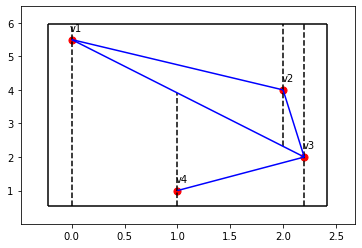

In [8]:
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.collections as mc

fig, ax = pl.subplots()

segment_vertical_plot = []
'''vertical lines'''
for s in vert_segment:
	stt = (s.plx, s.ply)
	end = (s.prx, s.pry)
	segment_vertical_plot.append([stt, end])
ax.add_collection(mc.LineCollection(segment_vertical_plot, linestyles='dashed', colors=('black')))

'''line segments'''
segment_plot = []
for s in segment:
	stt = (s.plx, s.ply)
	end = (s.prx, s.pry)
	segment_plot.append([stt, end])
ax.add_collection(mc.LineCollection(segment_plot, colors=('blue')))

'''bounding box'''
bound_box_plot = []
for s in bound_box:
	stt = (s.plx, s.ply)
	end = (s.prx, s.pry)
	bound_box_plot.append([stt, end])
ax.add_collection(mc.LineCollection(bound_box_plot, colors=('black')))

ax.set_xlim(0, 10)
ax.autoscale()
ax.margins(0.1)

for v in parse.vertex:
	plt.text(v.x-0.015, v.y+0.25, "v"+str(v.idx))
plt.scatter(vertex_x, vertex_y, color="red", s=50)

# for p in parse.point:
# 	plt.text(p.x-0.15, p.y-0.5, "p"+str(p.idx))
# plt.scatter(point_x, point_y, color="green", s=20)

# plt.savefig('trapzodialMap.png', dpi=1000)
plt.show()

In [4]:
# Algorithm TRAPEZOIDALMAP(S)
# Input. A set S of n non-crossing line segments.
# Output. The trapezoidal map T(S) and a search structure D for T(S) in a bounding box.
# 1. Determine a bounding box R that contains all segments of S, and initialize the trapezoidal map structure T and search structure D for it.
# 2. Compute a random permutation s1,s2,...,sn of the elements of S.
# 3. for i ← 1 to n
# 4. 	do Find the set ∆0,∆1,...,∆k of trapezoids in T properly intersected by si.
# 5. 	Remove ∆0,∆1,...,∆k from T and replace them by the new trapezoids that appear because of the insertion of si.
# 6. 	Remove the leaves for ∆0,∆1,...,∆k from D, and create leaves for the new trapezoids. Link the new leaves to the existing inner nodes by adding some new inner nodes, as explained below.


In [5]:
# Algorithm FOLLOWSEGMENT(T,D,si)
# Input. A trapezoidal map T, a search structure D for T, and a new segment si.
# Output. The sequence ∆0,...,∆k of trapezoids intersected by si.
# 1. Let p and q be the left and right endpoint of si.
# 2. Search with p in the search structure D to find ∆0.
# 3. j ← 0;
# 4. while q lies to the right of rightp(∆j)
# 5. 	do if rightp(∆j) lies above si
# 6. 		then Let ∆j+1 be the lower right neighbor of ∆j.
# 7. 		else Let ∆j+1 be the upper right neighbor of ∆j.
# 8. 	j ← j +1
# 9. return ∆0,∆1,...,∆j


/tmp/ipykernel_6723/2914644366.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


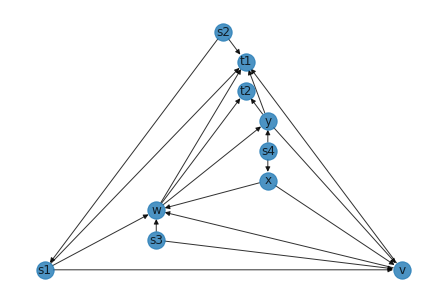

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

dag = {
	's1': ['v', 't1','w'],
	's2': ['t1','s1'],
	's3': ['v','w'],
	's4': ['x','y'],
	'x': ['v','w'],
	'v': ['t1', 'w'],
	'w': ['y','t1','t2'],
	'y': ['v','t1','t2'],
	't1': [],
	't2': []
	}

def main(G):
	fig = plt.figure()
	fig.show()

	graph = nx.DiGraph()

	for v in G.keys():
		graph.add_node(v)

	for n in G.items():
		for w in n[1]:
			graph.add_edge(n[0],w)

	# posit = nx.shell_layout(G) #ISN'T NEEDED ANYMORE

	nx.draw_planar(graph,with_labels = True, alpha=0.8) #NEW FUNCTION
	fig.canvas.draw()

main(dag)

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()

g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)

# drawing in circular layout
nx.draw_circular(g, with_labels = True)
plt.savefig("filename1.png")
# clearing the current plot
plt.clf()

# drawing in planar layout
nx.draw_planar(g, with_labels = True)
plt.savefig("filename2.png")
# clearing the current plot
plt.clf()

# drawing in random layout
nx.draw_random(g, with_labels = True)
plt.savefig("filename3.png")
# clearing the current plot
plt.clf()

# drawing in spectral layout
nx.draw_spectral(g, with_labels = True)
plt.savefig("filename4.png")
# clearing the current plot
plt.clf()

# drawing in spring layout
nx.draw_spring(g, with_labels = True)
plt.savefig("filename5.png")
# clearing the current plot
plt.clf()

# drawing in shell layout
nx.draw_shell(g, with_labels = True)
plt.savefig("filename6.png")
# clearing the current plot
plt.clf()

<Figure size 432x288 with 0 Axes>